In [57]:
import numpy as np
from keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import pandas as pd
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [58]:
df = pd.read_csv("E-commerce Dataset.csv",encoding="ISO-8859-1")

In [59]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [60]:
unique_columns = df.nunique()
print(unique_columns)

Order_Date               356
Time                   35275
Aging                     11
Customer_Id            38997
Gender                     2
Device_Type                2
Customer_Login_type        4
Product_Category           4
Product                   42
Sales                     39
Quantity                   5
Discount                   5
Profit                   391
Shipping_Cost            153
Order_Priority             4
Payment_method             5
dtype: int64


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [62]:
df = df.dropna()
df = df.sample(1000)

In [81]:
df.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.363000,58229.54400,151.290000,2.493000,0.293400,70.575100,7.059700
std,2.951261,26050.68713,67.701517,1.479236,0.132113,49.365824,4.935085
min,1.000000,10013.00000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35959.00000,85.000000,1.000000,0.200000,24.150000,2.400000
50%,5.000000,60058.50000,133.000000,2.000000,0.300000,59.250000,5.950000
75%,8.000000,80777.00000,218.000000,4.000000,0.400000,120.000000,12.000000
max,10.000000,99999.00000,250.000000,5.000000,0.500000,167.500000,16.800000


In [63]:
df.to_csv('sampled_data.csv', index=False)

In [64]:
X = df.drop('Sales', axis=1)
Y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
input_shape = X_train.shape[1]

In [65]:
numerical_features = ['Aging', 'Customer_Id', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost']
categorical_features = ['Order_Date', 'Time', 'Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category', 'Product', 'Order_Priority', 'Payment_method']

# Define the transformers for the numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor to your data
preprocessor.fit(X_train)

# Transform the data
X_train = preprocessor.transform(X_train).toarray()
X_test = preprocessor.transform(X_test).toarray()

y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
input_shape = X_train.shape[1]

In [66]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

regression=LinearRegression()
regression.fit(X_train, y_train)
reg_pred = regression.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(f"Mean Absolute Error: {mean_absolute_error(y_test, reg_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, reg_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, reg_pred))}")
r, _ = pearsonr(y_test, reg_pred)
score=r2_score(y_test, reg_pred)
print(f"R-value: {r}")
print(f"R-squared: {score}")

Mean Absolute Error: 7.4574001511948405
Mean Squared Error: 107.33379434875525
Root Mean Squared Error: 10.360202427981571
R-value: 0.9892224282561404
R-squared: 0.9776321495924383


In [67]:
!pip install lightgbm

In [68]:
# import numpy as np
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from scipy.stats import pearsonr

# # Define models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Lasso Regression": Lasso(alpha=0.1),
#     "Support Vector Regression": SVR(kernel='rbf'),
#     "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
#     "Random Forest": RandomForestRegressor(n_estimators=100),
#     "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
#     "AdaBoost": AdaBoostRegressor(n_estimators=100),
#     "XGBoost": XGBRegressor(n_estimators=100),
# }

# # Evaluate models
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
    
#     mae = mean_absolute_error(y_test, predictions)
#     mse = mean_squared_error(y_test, predictions)
#     rmse = np.sqrt(mse)
#     r, _ = pearsonr(y_test, predictions)
#     r_squared = r2_score(y_test, predictions)
    
#     print(f"{name}:")
#     print(f"  Mean Absolute Error: {mae:.4f}")
#     print(f"  Mean Squared Error: {mse:.4f}")
#     print(f"  Root Mean Squared Error: {rmse:.4f}")
#     print(f"  R-value: {r:.4f}")
#     print(f"  R-squared: {r_squared:.4f}")
#     print()


In [69]:
from keras.initializers import Zeros
model = Sequential([
    Dense(1, input_shape=(input_shape,), kernel_initializer=Zeros(), activation='linear')  # Output layer with one neuron for linear regression
])

# Compile the model with a suitable optimizer and loss function
model.compile(optimizer='sgd',  # Stochastic gradient descent
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Summary of the model
model.summary()

# Train the model with the entire dataset as one batch
model.fit(X_train, y_train, epochs=100, batch_size=len(X_train))

nn_pred = model.predict(X_test)
print(mean_absolute_error(y_test,nn_pred))
print(mean_squared_error(y_test,nn_pred))
print(np.sqrt(mean_squared_error(y_test,nn_pred)))

r, _ = pearsonr(y_test, nn_pred)
print(r)
print(f"R-squared: {r**2}")
score=r2_score(y_test, nn_pred)
print(score)

Model: "sequential_146"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_332 (Dense)           (None, 1)                 1160      
                                                                 
Total params: 1,160
Trainable params: 1,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 169ms/step - loss: 27256.5371 - mean_absolute_error: 150.7775
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 22846.8750 - mean_absolute_error: 136.5700
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 19203.9316 - mean_absolute_error: 123.7111
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 16191.5654 - mean_absolute_error: 112.0736
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 13698.0527 - mean_absolute_error: 101.7616
Epoch 

1/1 [==============================] - 0s 9ms/step - loss: 704.5432 - mean_absolute_error: 20.5177
Epoch 69/100
1/1 [==============================] - 0s 4ms/step - loss: 701.8303 - mean_absolute_error: 20.4789
Epoch 70/100
1/1 [==============================] - 0s 3ms/step - loss: 699.2220 - mean_absolute_error: 20.4418
Epoch 71/100
1/1 [==============================] - 0s 8ms/step - loss: 696.7112 - mean_absolute_error: 20.4057
Epoch 72/100
1/1 [==============================] - 0s 4ms/step - loss: 694.2908 - mean_absolute_error: 20.3707
Epoch 73/100
1/1 [==============================] - 0s 6ms/step - loss: 691.9547 - mean_absolute_error: 20.3374
Epoch 74/100
1/1 [==============================] - 0s 5ms/step - loss: 689.6974 - mean_absolute_error: 20.3052
Epoch 75/100
1/1 [==============================] - 0s 12ms/step - loss: 687.5134 - mean_absolute_error: 20.2744
Epoch 76/100
1/1 [==============================] - 0s 4ms/step - loss: 685.3978 - mean_absolute_error: 20.2450
Epoc

In [70]:
# import matplotlib.pyplot as plt

# # Assuming X_train, y_train, X_test, y_test are already defined

# input_shape = X_train.shape[1]

# # Store training and validation losses
# all_train_val_losses = []

# def generate_model(input_shape, num_layers, num_neurons, dropout_rate, learning_rate, l1_reg, l2_reg):
#     model = Sequential()
#     for i in range(int(num_layers)):
#         if i == 0:
#             model.add(Dense(int(num_neurons), activation='linear', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg), input_shape=(input_shape,)))
#         else:
#             model.add(Dense(int(num_neurons), activation='linear', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
#         model.add(Dropout(dropout_rate))
#     model.add(Dense(1, activation='linear'))
    
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    
#     return model

# def objective_function(num_layers, num_neurons, dropout_rate, learning_rate, l1_reg, l2_reg):
#     model = generate_model(input_shape, num_layers, num_neurons, dropout_rate, learning_rate, l1_reg, l2_reg)
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
#     history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0, callbacks=[early_stopping])
    
#     all_train_val_losses.append((history.history['loss'], history.history['val_loss']))
    
#     validation_loss = min(history.history['val_loss'])
#     return -validation_loss

# pbounds = {
#     'num_layers': (1, 2),
#     'num_neurons': (10, 100),
#     'dropout_rate': (0.1, 0.5),
#     'learning_rate': (1e-5, 1e-2),
#     'l1_reg': (1e-5, 1e-2),
#     'l2_reg': (1e-5, 1e-2)
# }

# optimizer = BayesianOptimization(
#     f=objective_function,
#     pbounds=pbounds,
#     random_state=1,
# )

# optimizer.maximize(
#     init_points=2,
#     n_iter=10,
# )

# # Plot all training and validation losses on separate subplots
# num_plots = len(all_train_val_losses)
# cols = 2
# rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed

# fig, axs = plt.subplots(rows, cols, figsize=(15, 15))

# for idx, (train_loss, val_loss) in enumerate(all_train_val_losses):
#     row, col = divmod(idx, cols)
#     axs[row, col].plot(train_loss, label='Train Loss')
#     axs[row, col].plot(val_loss, label='Validation Loss')
#     axs[row, col].set_title(f'Run {idx + 1}')
#     axs[row, col].set_xlabel('Epoch')
#     axs[row, col].set_ylabel('Loss')
#     axs[row, col].legend()

# # Hide any unused subplots
# for ax in axs.flatten()[num_plots:]:
#     ax.axis('off')

# plt.subplots_adjust(hspace=0.5, wspace=0.3)
# plt.show()

# best_params = optimizer.max['params']
# print(f"Best parameters: {best_params}")

# final_model = generate_model(
#     input_shape,
#     best_params['num_layers'],
#     best_params['num_neurons'],
#     best_params['dropout_rate'],
#     best_params['learning_rate'],
#     best_params['l1_reg'],
#     best_params['l2_reg']
# )

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# final_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0, callbacks=[early_stopping])

# y_pred = final_model.predict(X_test)
# r_squared = r2_score(y_test, y_pred)
# print(f"R-squared: {r_squared}")


|   iter    |  target   | dropou... |  l1_reg   |  l2_reg   | learni... | num_la... | num_ne... |
-------------------------------------------------------------------------------------------------


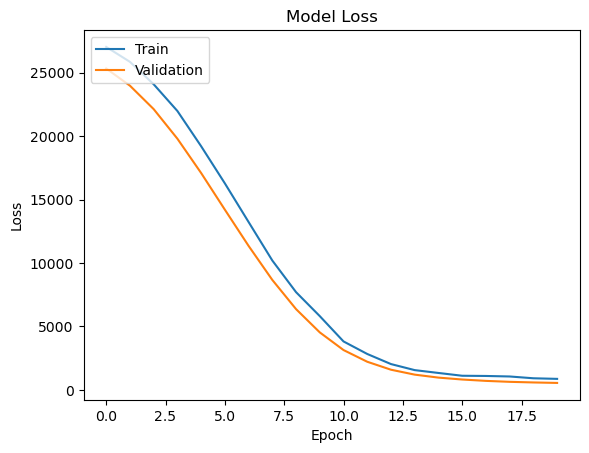

Model: "sequential_186"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_424 (Dense)           (None, 18)                20880     
                                                                 
 dropout_239 (Dropout)       (None, 18)                0         
                                                                 
 dense_425 (Dense)           (None, 1)                 19        
                                                                 
Total params: 20,899
Trainable params: 20,899
Non-trainable params: 0
_________________________________________________________________
validation_loss: 544.5311889648438
R-squared: 0.8917980291065284
| 1         | -544.5    | 0.2668    | 0.007206  | 1.114e-05 | 0.00303   | 1.147     | 18.31     |


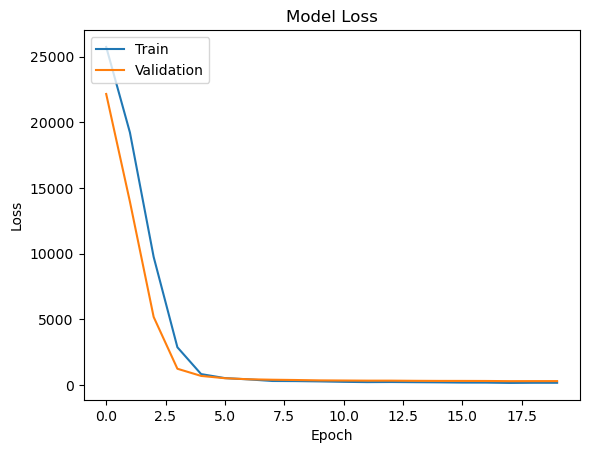

Model: "sequential_187"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_426 (Dense)           (None, 71)                82360     
                                                                 
 dropout_240 (Dropout)       (None, 71)                0         
                                                                 
 dense_427 (Dense)           (None, 1)                 72        
                                                                 
Total params: 82,432
Trainable params: 82,432
Non-trainable params: 0
_________________________________________________________________
validation_loss: 289.35382080078125
R-squared: 0.9490087817970585
| 2         | -289.4    | 0.1745    | 0.003462  | 0.003974  | 0.005393  | 1.419     | 71.67     |


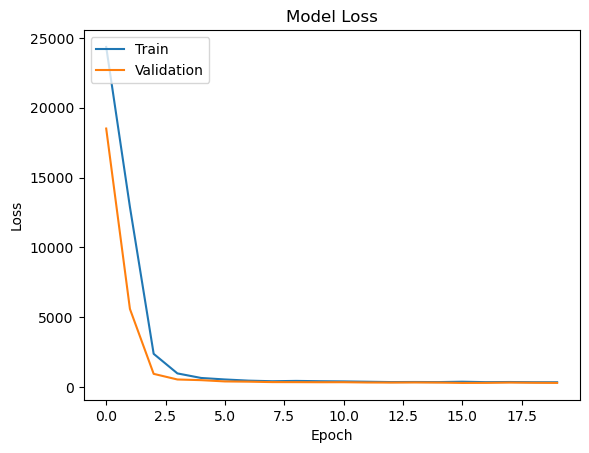

Model: "sequential_188"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_428 (Dense)           (None, 72)                83520     
                                                                 
 dropout_241 (Dropout)       (None, 72)                0         
                                                                 
 dense_429 (Dense)           (None, 1)                 73        
                                                                 
Total params: 83,593
Trainable params: 83,593
Non-trainable params: 0
_________________________________________________________________
validation_loss: 283.90802001953125
R-squared: 0.9521612452514314
| 3         | -283.9    | 0.3918    | 0.005776  | 0.0008213 | 0.008222  | 1.544     | 72.96     |


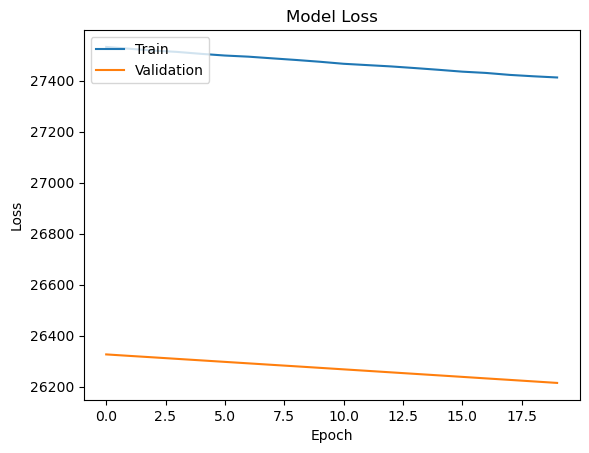

Model: "sequential_189"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_430 (Dense)           (None, 100)               116000    
                                                                 
 dropout_242 (Dropout)       (None, 100)               0         
                                                                 
 dense_431 (Dense)           (None, 1)                 101       
                                                                 
Total params: 116,101
Trainable params: 116,101
Non-trainable params: 0
_________________________________________________________________
validation_loss: 26214.724609375
R-squared: -4.883252639946273
| 4         | -2.621e+0 | 0.1       | 1e-05     | 0.01      | 1e-05     | 1.0       | 100.0     |


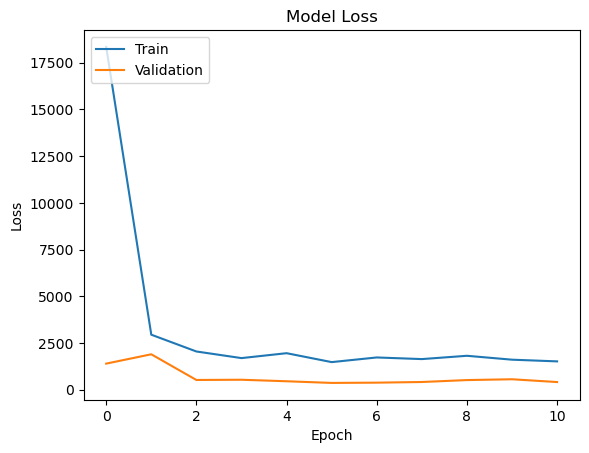

Model: "sequential_190"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_432 (Dense)           (None, 41)                47560     
                                                                 
 dropout_243 (Dropout)       (None, 41)                0         
                                                                 
 dense_433 (Dense)           (None, 41)                1722      
                                                                 
 dropout_244 (Dropout)       (None, 41)                0         
                                                                 
 dense_434 (Dense)           (None, 1)                 42        
                                                                 
Total params: 49,324
Trainable params: 49,324
Non-trainable params: 0
_________________________________________________________________
validation_loss: 361.5577697753906
R-squared: 0.

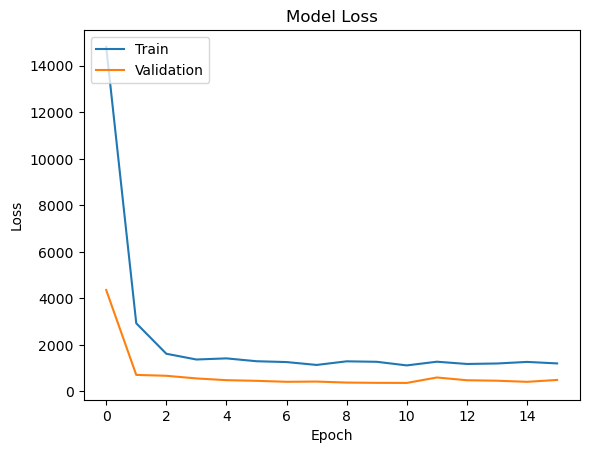

Model: "sequential_191"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_435 (Dense)           (None, 54)                62640     
                                                                 
 dropout_245 (Dropout)       (None, 54)                0         
                                                                 
 dense_436 (Dense)           (None, 54)                2970      
                                                                 
 dropout_246 (Dropout)       (None, 54)                0         
                                                                 
 dense_437 (Dense)           (None, 1)                 55        
                                                                 
Total params: 65,665
Trainable params: 65,665
Non-trainable params: 0
_________________________________________________________________
validation_loss: 364.04229736328125
R-squared: 0

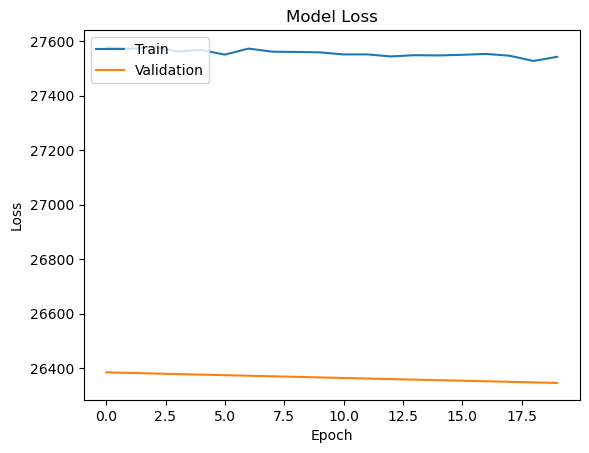

Model: "sequential_192"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_438 (Dense)           (None, 10)                11600     
                                                                 
 dropout_247 (Dropout)       (None, 10)                0         
                                                                 
 dense_439 (Dense)           (None, 10)                110       
                                                                 
 dropout_248 (Dropout)       (None, 10)                0         
                                                                 
 dense_440 (Dense)           (None, 1)                 11        
                                                                 
Total params: 11,721
Trainable params: 11,721
Non-trainable params: 0
_________________________________________________________________
validation_loss: 26345.08984375
R-squared: -4.90

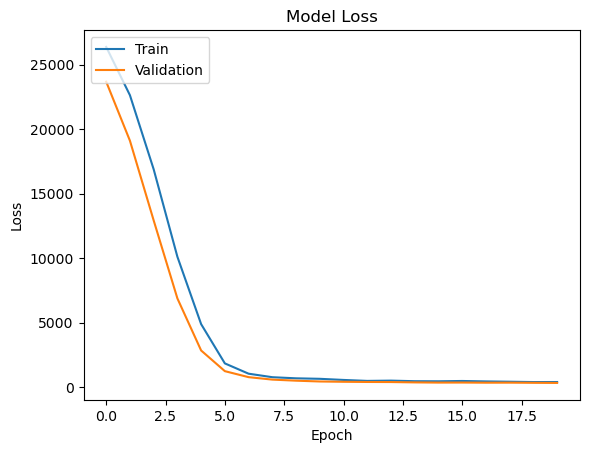

Model: "sequential_193"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_441 (Dense)           (None, 26)                30160     
                                                                 
 dropout_249 (Dropout)       (None, 26)                0         
                                                                 
 dense_442 (Dense)           (None, 1)                 27        
                                                                 
Total params: 30,187
Trainable params: 30,187
Non-trainable params: 0
_________________________________________________________________
validation_loss: 319.59674072265625
R-squared: 0.940345654426612
| 8         | -319.6    | 0.2154    | 0.006623  | 1e-05     | 0.005806  | 1.0       | 26.61     |


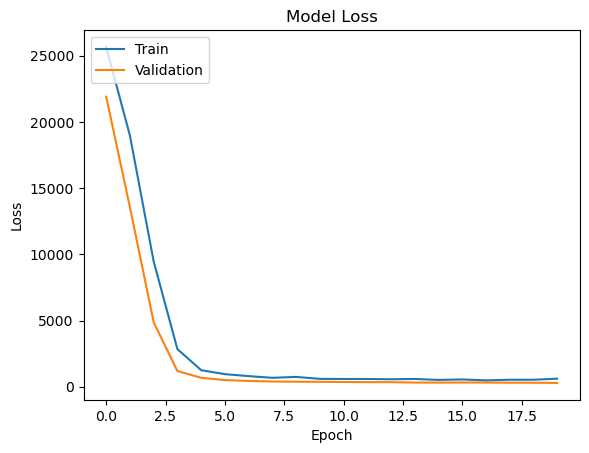

Model: "sequential_194"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_443 (Dense)           (None, 62)                71920     
                                                                 
 dropout_250 (Dropout)       (None, 62)                0         
                                                                 
 dense_444 (Dense)           (None, 1)                 63        
                                                                 
Total params: 71,983
Trainable params: 71,983
Non-trainable params: 0
_________________________________________________________________
validation_loss: 285.66839599609375
R-squared: 0.9468977893978008
| 9         | -285.7    | 0.4835    | 0.003731  | 0.001715  | 0.005966  | 1.07      | 62.47     |


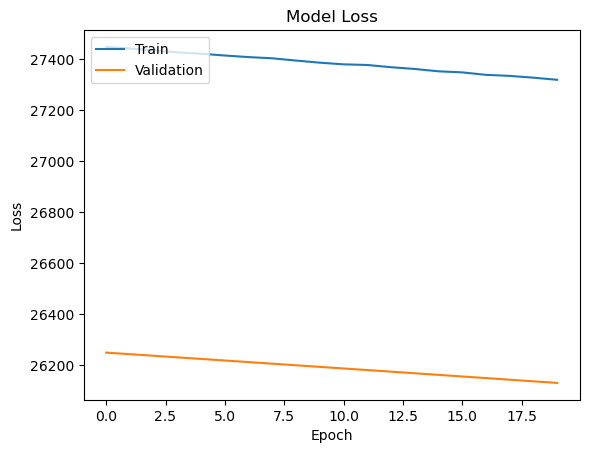

Model: "sequential_195"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_445 (Dense)           (None, 83)                96280     
                                                                 
 dropout_251 (Dropout)       (None, 83)                0         
                                                                 
 dense_446 (Dense)           (None, 1)                 84        
                                                                 
Total params: 96,364
Trainable params: 96,364
Non-trainable params: 0
_________________________________________________________________
validation_loss: 26129.11328125
R-squared: -4.862098521696289
| 10        | -2.613e+0 | 0.1       | 1e-05     | 0.01      | 1e-05     | 1.0       | 83.54     |


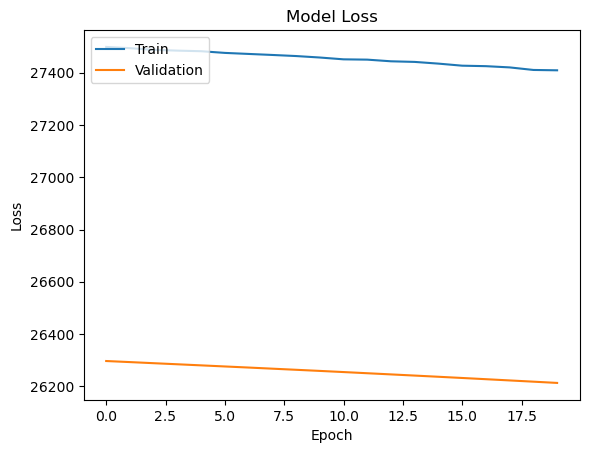

Model: "sequential_196"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_447 (Dense)           (None, 34)                39440     
                                                                 
 dropout_252 (Dropout)       (None, 34)                0         
                                                                 
 dense_448 (Dense)           (None, 34)                1190      
                                                                 
 dropout_253 (Dropout)       (None, 34)                0         
                                                                 
 dense_449 (Dense)           (None, 1)                 35        
                                                                 
Total params: 40,665
Trainable params: 40,665
Non-trainable params: 0
_________________________________________________________________
validation_loss: 26212.88671875
R-squared: -4.87

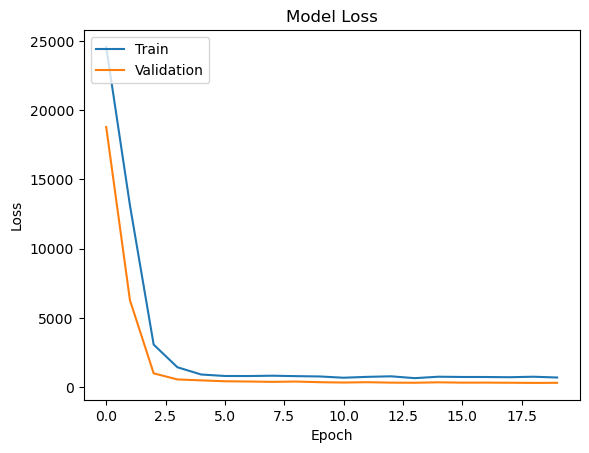

Model: "sequential_197"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_450 (Dense)           (None, 46)                53360     
                                                                 
 dropout_254 (Dropout)       (None, 46)                0         
                                                                 
 dense_451 (Dense)           (None, 1)                 47        
                                                                 
Total params: 53,407
Trainable params: 53,407
Non-trainable params: 0
_________________________________________________________________
validation_loss: 310.34637451171875
R-squared: 0.9479195841281449
| 12        | -310.3    | 0.5       | 0.009941  | 1e-05     | 0.01      | 1.991     | 46.99     |
Best parameters: {'dropout_rate': 0.3917545776602672, 'l1_reg': 0.005775773777741299, 'l2_reg': 0.0008213077732299031, 'learning_rate': 0.0082221715

In [77]:
from keras.layers import BatchNormalization, LeakyReLU
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2

# Assuming X_train and y_train are already defined
input_shape = X_train.shape[1]


def generate_model(input_shape, num_layers, num_neurons, dropout_rate, learning_rate, l1_reg, l2_reg):
    model = Sequential()
    for i in range(int(num_layers)):
        if(i == 0):
            model.add(Dense(int(num_neurons), activation='linear', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg), input_shape=(input_shape,)))
        else:
            model.add(Dense(int(num_neurons), activation='linear', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    
    # Compile the model with Adam optimizer and learning rate scheduling
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    return model

def objective_function(num_layers, num_neurons, dropout_rate, learning_rate, l1_reg, l2_reg):
    model = generate_model(input_shape, num_layers, num_neurons, dropout_rate, learning_rate, l1_reg, l2_reg)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0, callbacks=[early_stopping])
    
#   Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    model.summary()
    validation_loss = min(history.history['val_loss'])
    print(f"validation_loss: {validation_loss}")

    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    print(f"R-squared: {r_squared}")
    return -validation_loss

# Set the bounds for the hyperparameters
pbounds = {
    'num_layers': (1, 2),
    'num_neurons': (10, 100),
    'dropout_rate': (0.1, 0.5),
    'learning_rate': (1e-5, 1e-2),
    'l1_reg': (1e-5, 1e-2),
    'l2_reg': (1e-5, 1e-2)
}

optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(
    init_points=2,
    n_iter=10,
)

best_params = optimizer.max['params']
print(f"Best parameters: {best_params}")
    
# Build the final model with the best parameters
final_model = generate_model(
    input_shape,
    best_params['num_layers'],
    best_params['num_neurons'],
    best_params['dropout_rate'],
    best_params['learning_rate'],
    best_params['l1_reg'],
    best_params['l2_reg']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
final_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0, callbacks=[early_stopping])

y_pred = final_model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

In [78]:
# | 2         | -280.2    | 0.1745    | 0.003462  | 0.003974  | 0.005393  | 1.419     | 71.67     |
final_model.summary()

Model: "sequential_198"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_452 (Dense)           (None, 72)                83520     
                                                                 
 dropout_255 (Dropout)       (None, 72)                0         
                                                                 
 dense_453 (Dense)           (None, 1)                 73        
                                                                 
Total params: 83,593
Trainable params: 83,593
Non-trainable params: 0
_________________________________________________________________


In [79]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming y_test are the true values and y_pred are the model's predictions
y_pred = final_model.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
r, _ = pearsonr(y_test, y_pred)
r2Score=r2_score(y_test, y_pred)
print(f"R-value: {r}")
print(f"R-squared: {r**2}")
print(f"R-squared: {r2Score}")

Mean Absolute Error: 11.055604124069214
Mean Squared Error: 233.0719759319701
Root Mean Squared Error: 15.266694990467652
R-value: [0.9772787868306606]
R-squared: [0.9550738271892077]
R-squared: 0.9514289127345884


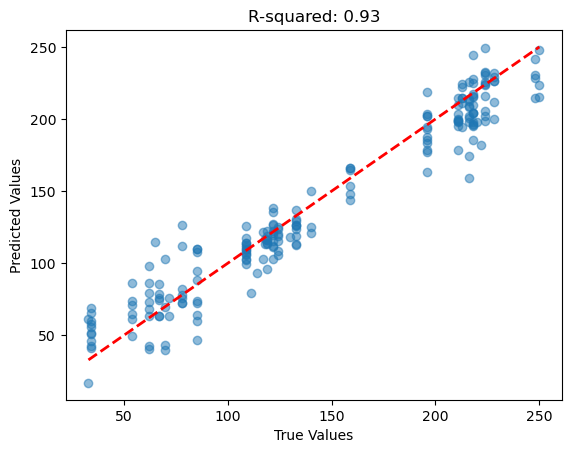

In [54]:
# Scatter plot of true vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R-squared: {r2Score:.2f}')
plt.show()

In [17]:
import pickle

weights = final_model.get_weights()

# Step 2: Save the architecture as a JSON string
architecture = final_model.to_json()

# Step 3: Create a dictionary for the weights and architecture
model_dict = {
    'weights': weights,
    'architecture': architecture
}

# Step 4: Use `pickle` to serialize the dictionary
with open('temp_model.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

print("Model saved to temp_model.pkl")

Model saved to temp_model.pkl


In [18]:
import tensorflow as tf

with open('temp_model.pkl', 'rb') as f:
    model_dict = pickle.load(f)
    
# Reconstruct the model from the architecture
model = tf.keras.models.model_from_json(model_dict['architecture'])

# Load the weights
model.set_weights(model_dict['weights'])

print("Model loaded from temp_model.pkl")

y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

# Calculate the Pearson correlation coefficient
r, _ = pearsonr(y_test, y_pred)
r2Score=r2_score(y_test, y_pred)
print(f"R-value: {r}")
print(f"R-squared: {r**2}")
print(f"R-squared: {r2Score}")

Model loaded from temp_model.pkl
Mean Absolute Error: 11.735394220352173
Mean Squared Error: 239.70093458113698
Root Mean Squared Error: 15.482278081120265
R-value: [0.9752659924464464]
R-squared: [0.9511437560225521]
R-squared: 0.9510434396420174


In [19]:
test_input = [ "9.0", "63727", "1.0","0.4","102.4", "10.2","2018-05-09", "21:36:13",
              "Female", "Web","Member", "Home & Furniture", "Towels", "Medium","money_order"]

numerical_features = ['Aging', 'Customer_Id', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost']
categorical_features = ['Order_Date', 'Time', 'Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category', 'Product', 'Order_Priority', 'Payment_method']

numerical_features = ['Aging', 'Customer_Id', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost']
categorical_features = ['Order_Date', 'Time', 'Gender', 'Device_Type', 'Customer_Login_type', 
                        'Product_Category', 'Product', 'Order_Priority', 'Payment_method']

# Combine the feature columns into a single list
all_features = numerical_features + categorical_features

test_df = pd.DataFrame([test_input], columns=all_features)

# Transform the single test input
X_test_single = preprocessor.transform(test_df)

# Convert to array if necessary
X_test_single = X_test_single.toarray()

# Reshape the input to ensure it is 2D
X_test_single = X_test_single.reshape(1, -1)

# Make a prediction
prediction = model.predict(X_test_single)

print(prediction)

test_df = pd.DataFrame([test_input], columns=all_features)

[[194.37286]]
